In [39]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

# Load The Data

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset) #number of batchs with 32 images

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 1 2 0 1 1 1 1 0 1 2 0 1 0 1 0 0 1 1 0 0 1 2 1 1 0 1 1 0]


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[113. 110. 121.]
  [107. 104. 115.]
  [143. 140. 151.]
  ...
  [126. 124. 135.]
  [133. 131. 142.]
  [139. 137. 148.]]

 [[132. 129. 140.]
  [160. 157. 168.]
  [116. 113. 124.]
  ...
  [108. 106. 117.]
  [117. 115. 126.]
  [125. 123. 134.]]

 [[145. 142. 153.]
  [114. 111. 122.]
  [130. 127. 138.]
  ...
  [120. 118. 129.]
  [121. 119. 130.]
  [122. 120. 131.]]

 ...

 [[177. 174. 181.]
  [179. 176. 183.]
  [178. 175. 182.]
  ...
  [130. 125. 132.]
  [143. 138. 145.]
  [163. 158. 165.]]

 [[181. 178. 185.]
  [172. 169. 176.]
  [166. 163. 170.]
  ...
  [147. 142. 149.]
  [155. 150. 157.]
  [146. 141. 148.]]

 [[189. 186. 193.]
  [160. 157. 164.]
  [155. 152. 159.]
  ...
  [134. 129. 136.]
  [160. 155. 162.]
  [144. 139. 146.]]]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


# Display Some Images

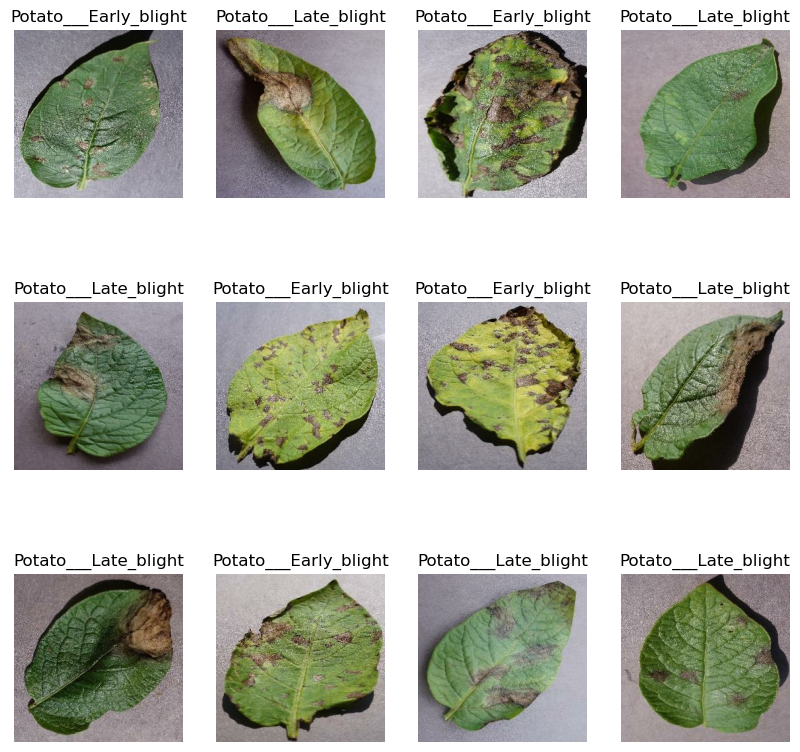

In [9]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

# Preprocessing

## Spliting into Training Set, Validation Set and Test Set

In [10]:
len(dataset)

68

In [11]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds= dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54) #20% for validation(10%) and test(10%)
len(test_ds)

14

In [14]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_participation_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_participation_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [22]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Feature Scalling and Data Argumentation

__Put Every Images in the Same Size and SCALE__

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

__Data Argumentation__

In [24]:
data_argumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# Model Buliding - CNN Model

In [27]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_argumentation,
    layers.Conv2D(32, (3,3), activation="relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    #Pooling
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    #Flatenning
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    #Output LAyer
    layers.Dense(n_classes, activation="softmax")
])

model.build(input_shape=input_shape)

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     multiple                  0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [29]:
model.compile(
optimizer="adam",
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=["accuracy"])

# Train the Model

In [30]:
history = model.fit(
train_ds,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds)

Epoch 1/50
54/54 [==============================] - 145s 2s/step - loss: 0.9147 - accuracy: 0.4867 - val_loss: 0.7891 - val_accuracy: 0.6562
Epoch 2/50
54/54 [==============================] - 119s 2s/step - loss: 0.6718 - accuracy: 0.7153 - val_loss: 0.4267 - val_accuracy: 0.8281
Epoch 3/50
54/54 [==============================] - 132s 2s/step - loss: 0.4639 - accuracy: 0.8096 - val_loss: 0.3350 - val_accuracy: 0.8750
Epoch 4/50
54/54 [==============================] - 114s 2s/step - loss: 0.3514 - accuracy: 0.8553 - val_loss: 0.3459 - val_accuracy: 0.8438
Epoch 5/50
54/54 [==============================] - 136s 3s/step - loss: 0.3182 - accuracy: 0.8738 - val_loss: 0.2440 - val_accuracy: 0.9062
Epoch 6/50
54/54 [==============================] - 122s 2s/step - loss: 0.2205 - accuracy: 0.9051 - val_loss: 0.1885 - val_accuracy: 0.9115
Epoch 7/50
54/54 [==============================] - 122s 2s/step - loss: 0.2243 - accuracy: 0.9132 - val_loss: 0.2415 - val_accuracy: 0.8854
Epoch 8/50
54

54/54 [==============================] - 106s 2s/step - loss: 0.0374 - accuracy: 0.9855 - val_loss: 0.2152 - val_accuracy: 0.9427
Epoch 42/50
54/54 [==============================] - 106s 2s/step - loss: 0.0205 - accuracy: 0.9919 - val_loss: 0.0353 - val_accuracy: 0.9844
Epoch 43/50
54/54 [==============================] - 105s 2s/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0210 - val_accuracy: 0.9896
Epoch 44/50
54/54 [==============================] - 106s 2s/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 45/50
54/54 [==============================] - 105s 2s/step - loss: 0.0640 - accuracy: 0.9769 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 46/50
54/54 [==============================] - 106s 2s/step - loss: 0.0300 - accuracy: 0.9873 - val_loss: 0.0899 - val_accuracy: 0.9583
Epoch 47/50
54/54 [==============================] - 106s 2s/step - loss: 0.0203 - accuracy: 0.9948 - val_loss: 0.0197 - val_accuracy: 0.9896
Epoch 48/50
54/54 

In [31]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 16s 676ms/step - loss: 0.0547 - accuracy: 0.9844


In [32]:
scores

[0.05469602718949318, 0.984375]

In [33]:
history

In [34]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

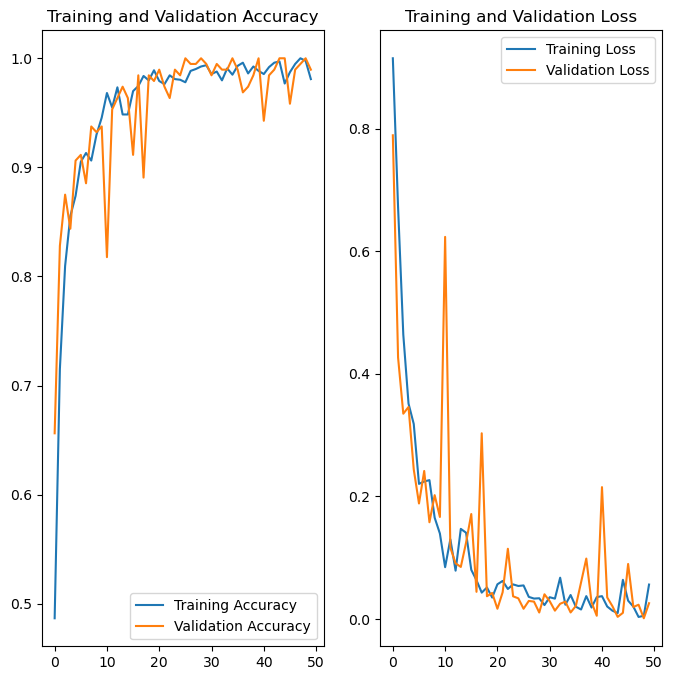

In [46]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

# Test the Model- Let´s make some predictions

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 400ms/step
prediction label: Potato___Late_blight


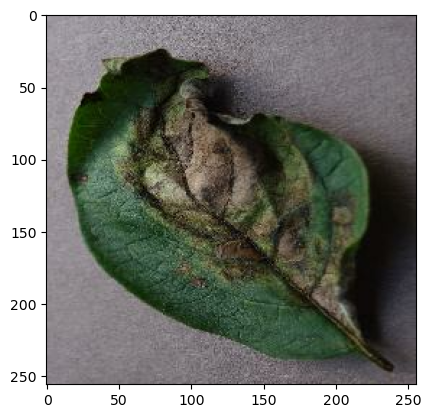

In [40]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("prediction label:", class_names[np.argmax(batch_prediction[0])])
    

__Function to Predict Returning the Confidence__

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #create the batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 45ms/step


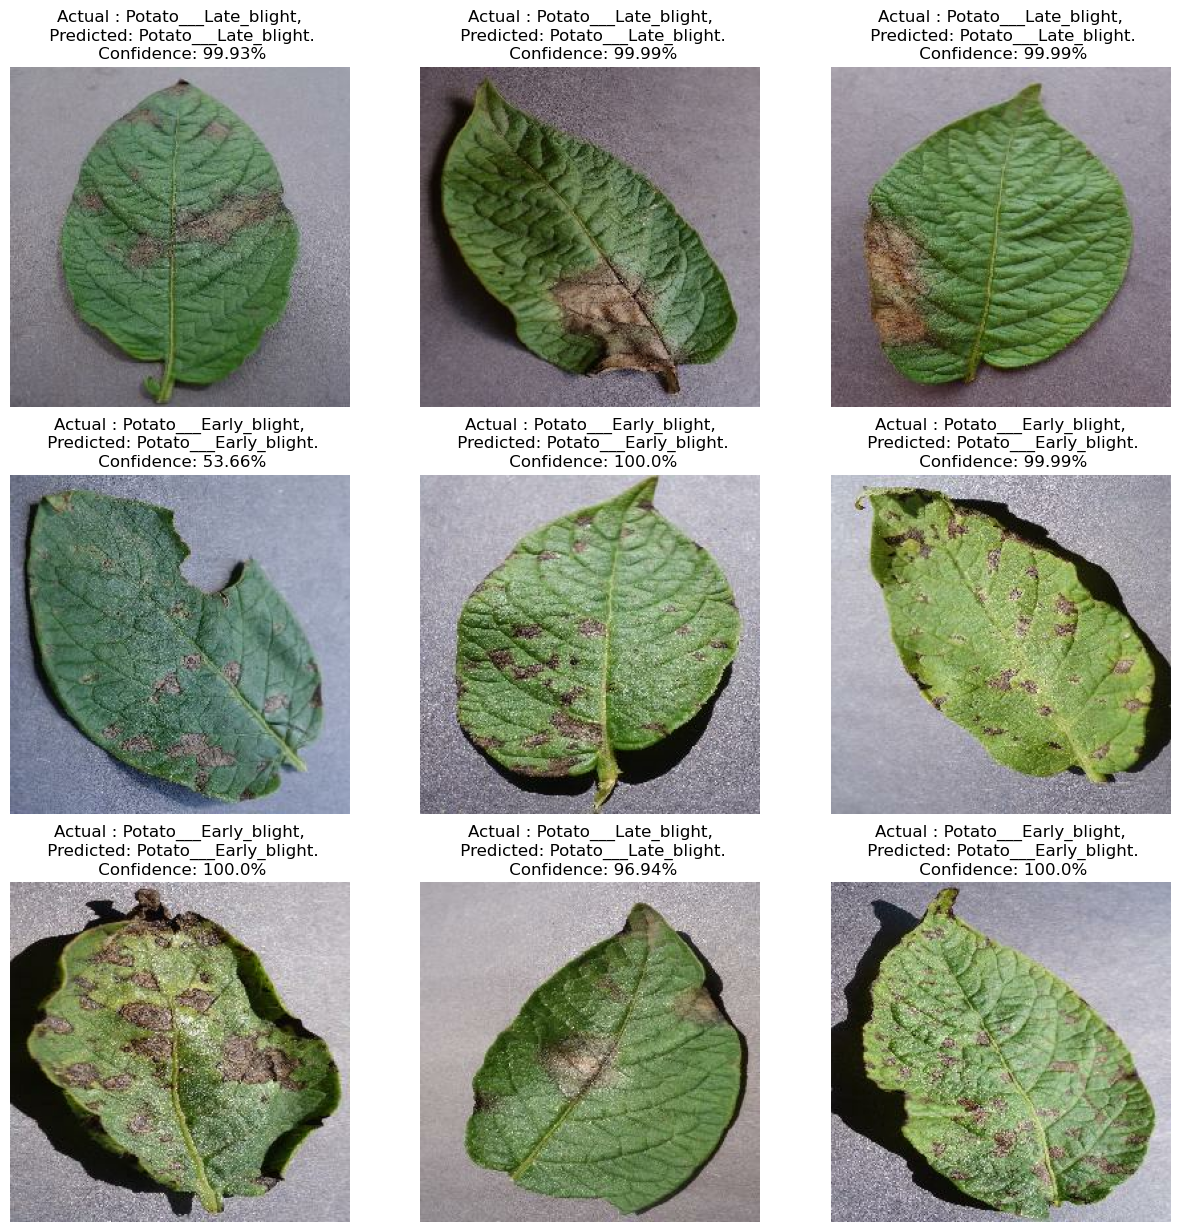

In [52]:
#Let´s do some more predictions in 9 images
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual : {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

# Save the Model

In [54]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
